In [520]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
from nltk import word_tokenize, RegexpTokenizer
import gensim.downloader as api
import matplotlib.pyplot as plt

In [521]:
data = pd.read_csv('./data/train.csv')

In [522]:
import pandas as pd
import numpy as np
import os
import string
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [523]:
data.iloc[:,2:] = data.iloc[:,2:]*2-2
data_train = data.iloc[:3300,:]
data_val = data.iloc[3300:,:]
data.head

<bound method NDFrame.head of            text_id                                          full_text  \
0     0016926B079C  I think that students would benefit from learn...   
1     0022683E9EA5  When a problem is a change you have to let it ...   
2     00299B378633  Dear, Principal\n\nIf u change the school poli...   
3     003885A45F42  The best time in life is when you become yours...   
4     0049B1DF5CCC  Small act of kindness can impact in other peop...   
...            ...                                                ...   
3906  FFD29828A873  I believe using cellphones in class for educat...   
3907  FFD9A83B0849  Working alone, students do not have to argue w...   
3908  FFDC4011AC9C  "A problem is a chance for you to do your best...   
3909  FFE16D704B16  Many people disagree with Albert Schweitzer's ...   
3910  FFED00D6E0BD  Do you think that failure is the main thing fo...   

      cohesion  syntax  vocabulary  phraseology  grammar  conventions  
0          5.0     5.

In [524]:
data.vocabulary.value_counts()

4.0    1503
5.0    1007
6.0     577
3.0     528
2.0     124
7.0     115
8.0      41
1.0      14
0.0       2
Name: vocabulary, dtype: int64

In [525]:
full_text = data_train['full_text']
cohesion = data_train['cohesion']
syntax = data_train['syntax']
vocabulary = data_train['vocabulary']
phraseology = data_train['phraseology']
grammar = data_train['grammar']
conventions = data_train['conventions']

In [526]:
full_text_val = data_val['full_text']
cohesion_val = data_val['cohesion']
syntax_val = data_val['syntax']
vocabulary_val = data_val['vocabulary']
phraseology_val = data_val['phraseology']
grammar_val = data_val['grammar']
conventions_val = data_val['conventions']

In [527]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/arpan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [528]:
def CleanText(sentences):
    sentences = sentences.apply(lambda sequence : 
                                [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])
    sentences = sentences.apply(lambda wrd: ''.join(wrd))
    sentences = sentences.apply(lambda sequence: 
                                [word for word in sequence.split() if word not in stop_words])
    sentences = sentences.apply(lambda wrd: ' '.join(wrd))
    return sentences

def CleanFeatures(sentences):
    sentences = sentences.apply(lambda sequence:
                                            [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])
    sentences = sentences.apply(lambda wrd: ''.join(wrd))
    sentences = sentences.apply(lambda sequence:
                                            [word for word in sequence.split() if word not in stop_words])
    sentences = sentences.apply(lambda wrd: ' '.join(wrd))
    return sentences


In [529]:
#clean_text = CleanFeatures(full_text)
clean_text = full_text

In [530]:
from transformers import AutoTokenizer

In [531]:
list_words = [len(text.split()) for text in clean_text]
#seq_len = max(list_words)
seq_len = 512
seq_len

512

In [532]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [533]:
input_ids = []
attention_mask = []
for text in clean_text:
    tokens = tokenizer.encode_plus(text, max_length=seq_len, padding='max_length',
                         truncation=True, return_token_type_ids= True,
                         return_tensors = 'np')
    input_ids.append(tokens['input_ids'])
    attention_mask.append(tokens['attention_mask'])

In [534]:
input_ids_val = []
attention_mask_val = []
for text in full_text_val:
    tokens = tokenizer.encode_plus(text, max_length=seq_len, padding='max_length',
                         truncation=True, return_token_type_ids= True,
                         return_tensors = 'np')
    input_ids_val.append(tokens['input_ids'])
    attention_mask_val.append(tokens['attention_mask'])

In [535]:
input_ids = np.asarray(input_ids)
attention_mask = np.asarray(attention_mask)
input_ids.shape

(3300, 1, 512)

In [536]:
input_ids_val = np.asarray(input_ids_val)
attention_mask_val = np.asarray(attention_mask_val)
input_ids_val.shape

(611, 1, 512)

In [537]:
input_ids = np.reshape(input_ids, (input_ids.shape[0], input_ids.shape[2]))
attention_mask = np.reshape(attention_mask, (attention_mask.shape[0], attention_mask.shape[2]))
print(input_ids.shape)
print(attention_mask.shape)

(3300, 512)
(3300, 512)


In [538]:
input_ids_val = np.reshape(input_ids_val, (input_ids_val.shape[0], input_ids_val.shape[2]))
attention_mask_val = np.reshape(attention_mask_val, (attention_mask_val.shape[0], attention_mask_val.shape[2]))
print(input_ids_val.shape)
print(attention_mask_val.shape)

(611, 512)
(611, 512)


In [539]:
syntax = np.asarray(syntax)
cohesion = np.asarray(cohesion)
vocabulary = np.asarray(vocabulary)
phraseology = np.asarray(phraseology)
grammar = np.asarray(grammar)
conventions = np.asarray(conventions)

In [540]:
syntax_val = np.asarray(syntax_val)
cohesion_val = np.asarray(cohesion_val)
vocabulary_val = np.asarray(vocabulary_val)
phraseology_val = np.asarray(phraseology_val)
grammar_val = np.asarray(grammar_val)
conventions_val = np.asarray(conventions_val)

## Bert Model

In [409]:
from transformers import TFBertModel
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [410]:
from keras.layers import LSTM, Lambda
from keras.layers import add, maximum, subtract, minimum

In [411]:
def resnet(inputs, units):
    x = tf.keras.layers.LSTM(units,return_sequences = True, dropout=0.15)(inputs)
    return x

In [557]:
units = 8
input_ids_m = tf.keras.layers.Input(shape = (seq_len, ), dtype = 'int32')
attention_mask_n = tf.keras.layers.Input(shape = (seq_len, ),  dtype = 'int32')
bert_m = bert(input_ids_m, attention_mask = attention_mask_n)[0]
x = resnet(bert_m, units)
for stack in range(4):
    for block in range(1):
        y = resnet(x, units)
        if stack > 0 and block == 0:
            x = tf.keras.layers.LSTM(units, return_sequences = True, dropout=0.15, recurrent_dropout=0.15)(x)
        x = minimum([x, y])
    units *=2
x1 = tf.keras.layers.GlobalAveragePooling1D()(x)
x2 = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.concatenate([x1, x2], name="our_param")
y1 = tf.keras.layers.Dense(1,  name='syntax',activation = 'relu')(x)
y2 = tf.keras.layers.Dense(1, name='cohesion',activation = 'relu')(x)
y3 = tf.keras.layers.Dense(1, name='vocabulary',activation = 'relu')(x)
y4 = tf.keras.layers.Dense(1, name='phraseology',activation = 'relu')(x)
y5 = tf.keras.layers.Dense(1, name='grammar',activation = 'relu')(x)
y6 = tf.keras.layers.Dense(1, name='conventions', activation='relu')(x)
m = tf.keras.models.Model(inputs = [input_ids_m, attention_mask_n], 
                          outputs = [y1,y2,y3,y4,y5,y6])

In [558]:
m.layers[2].trainable = False
m.summary()

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_57 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 input_58 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 tf_bert_model_8 (TFBertModel)  TFBaseModelOutputWi  108310272   ['input_57[0][0]',               
                                thPoolingAndCrossAt               'input_58[0][0]']               
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                        

In [559]:
tf.keras.utils.plot_model(m, show_shapes=True, 
                          show_dtype=False, 
                          show_layer_names=True, 
                          expand_nested=True,
                          show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [560]:
m.compile(loss="mse", optimizer= "adam", metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [561]:
mu = data.iloc[:,2:].mean()
std = data.iloc[:,2:].std(axis = 0)

data_norm = (data.iloc[:,2:]-mu)/std
data_norm_train = data_norm.iloc[:3300, :]
data_norm_val = data_norm.iloc[3300:, :]

syntax_train = data_norm_train.syntax.values
cohesion_trian = data_norm_train.cohesion.values
vocabulary_train = data_norm_train.vocabulary.values
phraseology_train = data_norm_train.phraseology.values
grammar_train = data_norm_train.grammar.values
conventions_train = data_norm_train.conventions.values

syntax_val = data_norm_val.syntax.values
cohesion_val = data_norm_val.cohesion.values
vocabulary_val = data_norm_val.vocabulary.values
phraseology_val = data_norm_val.phraseology.values
grammar_val = data_norm_val.grammar.values
conventions_val = data_norm_val.conventions.values

y_train = [syntax_train, cohesion_trian, vocabulary_train, phraseology_train, grammar_train, conventions_train]
y_val = [syntax_val, cohesion_val, vocabulary_val, phraseology_val, grammar_val, conventions_val]

In [563]:
history_training = m.fit([input_ids, attention_mask],
                         y = y_train,
                         batch_size= 8,
                         validation_split = 0.15, 
                         epochs= 1)

351/351 [==============================] - 1688s 5s/step - loss: 5.0781 - syntax_loss: 0.7652 - cohesion_loss: 1.0029 - vocabulary_loss: 1.0108 - phraseology_loss: 0.7840 - grammar_loss: 0.7566 - conventions_loss: 0.7586 - syntax_root_mean_squared_error: 0.8748 - cohesion_root_mean_squared_error: 1.0014 - vocabulary_root_mean_squared_error: 1.0054 - phraseology_root_mean_squared_error: 0.8854 - grammar_root_mean_squared_error: 0.8698 - conventions_root_mean_squared_error: 0.8710 - val_loss: 4.9554 - val_syntax_loss: 0.7311 - val_cohesion_loss: 0.9699 - val_vocabulary_loss: 0.9509 - val_phraseology_loss: 0.7229 - val_grammar_loss: 0.7875 - val_conventions_loss: 0.7931 - val_syntax_root_mean_squared_error: 0.8551 - val_cohesion_root_mean_squared_error: 0.9849 - val_vocabulary_root_mean_squared_error: 0.9751 - val_phraseology_root_mean_squared_error: 0.8502 - val_grammar_root_mean_squared_error: 0.8874 - val_conventions_root_mean_squared_error: 0.8906


In [564]:
m.save_weights('bert_model_weights_dense.h5')

In [565]:
pred = m.predict([input_ids_val, attention_mask_val])

20/20 [==============================] - 248s 12s/step


In [572]:
pred = np.asanyarray(pred)
pred = pred.reshape((pred.shape[0],pred.shape[1]))
pred = pred.transpose()
pred.shape

(611, 6)

In [578]:
from sklearn.metrics import mean_squared_error
y_val = np.asanyarray(y_val).transpose()
np.sqrt(mean_squared_error(y_val, pred))

0.9391402359734219

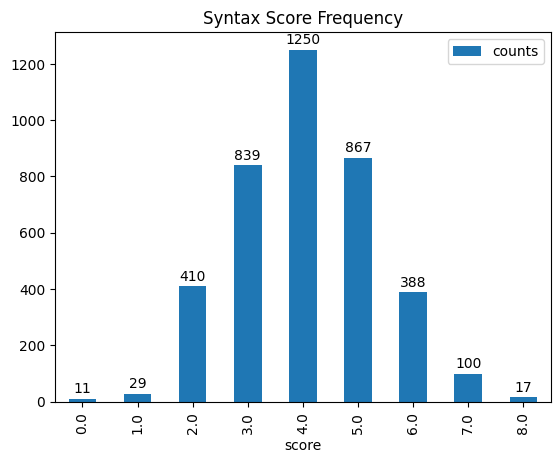

In [510]:
syntax_values = pd.DataFrame(data.iloc[:,2:].syntax.value_counts())
syntax_values.reset_index(inplace= True)
syntax_values.columns = ['score', 'counts']
syntax_values.sort_values('score', inplace=True)
ax = syntax_values.plot(x = 'score', y = 'counts', kind = 'bar', title= 'Syntax Score Frequency')

for i in range(syntax_values.shape[0]):
    x = syntax_values.iloc[i,0]
    y = syntax_values.iloc[i,1]
    ax.annotate(str(y), xy= (x,y+20), ha = 'center')
plt.show()

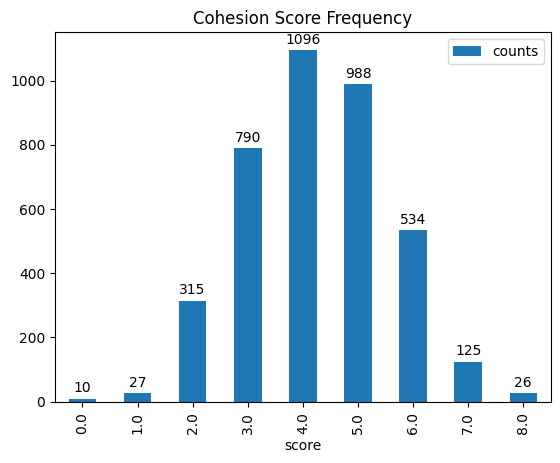

In [511]:
cohesion_values = pd.DataFrame(data.iloc[:,2:].cohesion.value_counts())
cohesion_values.reset_index(inplace= True)
cohesion_values.columns = ['score', 'counts']
cohesion_values.sort_values('score', inplace=True)
ax = cohesion_values.plot(x = 'score', y = 'counts', kind = 'bar', title= 'Cohesion Score Frequency')

for i in range(cohesion_values.shape[0]):
    x = cohesion_values.iloc[i,0]
    y = cohesion_values.iloc[i,1]
    ax.annotate(str(y), xy= (x,y+20), ha = 'center')
plt.show()

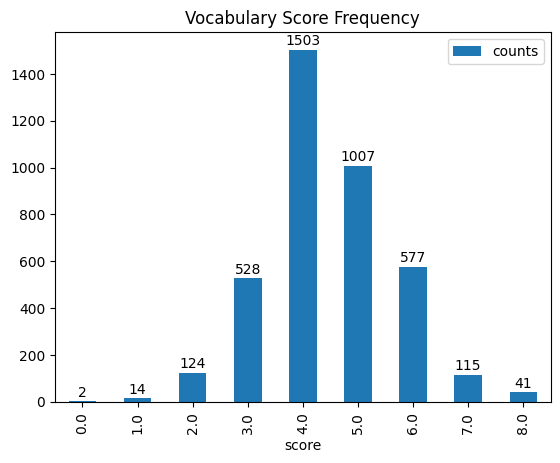

In [513]:
vocabulary_values = pd.DataFrame(data.iloc[:,2:].vocabulary.value_counts())
vocabulary_values.reset_index(inplace= True)
vocabulary_values.columns = ['score', 'counts']
vocabulary_values.sort_values('score', inplace=True)
ax = vocabulary_values.plot(x = 'score', y = 'counts', kind = 'bar', title= 'Vocabulary Score Frequency')

for i in range(vocabulary_values.shape[0]):
    x = vocabulary_values.iloc[i,0]
    y = vocabulary_values.iloc[i,1]
    ax.annotate(str(y), xy= (x,y+20), ha = 'center')
plt.show()

In [413]:
test_model.layers[2].trainable = False

In [414]:
test_model.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_49 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 input_50 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 tf_bert_model_8 (TFBertModel)  TFBaseModelOutputWi  108310272   ['input_49[0][0]',               
                                thPoolingAndCrossAt               'input_50[0][0]']               
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                        

In [382]:
tf.keras.utils.plot_model(m, show_shapes=True, 
                          show_dtype=False, 
                          show_layer_names=True, 
                          expand_nested=True,
                          show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [415]:
syntax = tf.keras.utils.to_categorical(syntax)
cohesion = tf.keras.utils.to_categorical(cohesion)
vocabulary = tf.keras.utils.to_categorical(vocabulary)
phraseology = tf.keras.utils.to_categorical(phraseology)
grammar = tf.keras.utils.to_categorical(grammar)
conventions = tf.keras.utils.to_categorical(conventions)


In [416]:
syntax_val = tf.keras.utils.to_categorical(syntax_val)
cohesion_val = tf.keras.utils.to_categorical(cohesion_val)
vocabulary_val = tf.keras.utils.to_categorical(vocabulary_val)
phraseology_val = tf.keras.utils.to_categorical(phraseology_val)
grammar_val = tf.keras.utils.to_categorical(grammar_val)
conventions_val = tf.keras.utils.to_categorical(conventions_val)


In [386]:
m.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [417]:
y_train = np.stack([syntax, cohesion, vocabulary, phraseology, grammar, conventions], axis = 1)
y_train.shape

(3300, 6, 9)

In [418]:
y_test = np.stack([syntax_val, cohesion_val, vocabulary_val, 
                   phraseology_val, grammar_val, conventions_val], axis = 1)
y_test.shape

(611, 6, 9)

In [387]:
history_training = m.fit([input_ids, attention_mask],
                         y = y_train,
                         batch_size= 64,
                         validation_split = 0.15, 
                         epochs= 6)

Epoch 1/6
 2/44 [>.............................] - ETA: 24:27 - loss: 2.1657 - categorical_accuracy: 0.1432

KeyboardInterrupt: 

In [28]:
m.save('bert_model_2.h5')

In [37]:
m.save_weights('bert_model_weights_2.h5')

In [305]:
units = 32
input_ids_m = tf.keras.layers.Input(shape = (seq_len, ), dtype = 'int32')
attention_mask_n = tf.keras.layers.Input(shape = (seq_len, ),  dtype = 'int32')
bert_m = bert(input_ids_m, attention_mask = attention_mask_n)[0]
x = resnet(bert_m, units)
for stack in range(3):
    for block in range(1):
        y = resnet(x, units)
        if stack > 0 and block == 0:
            x = tf.keras.layers.LSTM(units, return_sequences = True, dropout=0.15, recurrent_dropout=0.15)(x)
        x = minimum([x, y])
    units *=2
x1 = tf.keras.layers.GlobalAveragePooling1D()(x)
x2 = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.concatenate([x1, x2], name="our_param")
y1 = tf.keras.layers.Dense(1,  name='syntax')(x)
y2 = tf.keras.layers.Dense(1, name='cohesion')(x)
y3 = tf.keras.layers.Dense(1, name='vocabulary')(x)
y4 = tf.keras.layers.Dense(1, name='phraseology')(x)
y5 = tf.keras.layers.Dense(1, name='grammar')(x)
y6 = tf.keras.layers.Dense(1, name='conventions')(x)
test_model = tf.keras.models.Model(inputs = [input_ids_m, attention_mask_n], outputs = [y1, y2, y3, y4, y5, y6])

In [306]:
test_model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 input_26 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 tf_bert_model_6 (TFBertModel)  TFBaseModelOutputWi  108310272   ['input_25[0][0]',               
                                thPoolingAndCrossAt               'input_26[0][0]']               
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                        

In [419]:
test_model.load_weights('bert_model_weights_2.h5')

In [420]:
test_model

In [424]:
pred = test_model.predict([input_ids_val,attention_mask_val])

20/20 [==============================] - 246s 12s/step


In [429]:
metric = tf.keras.metrics.CategoricalAccuracy()
metric.update_state(y_test, pred)
metric.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.36988544>

In [441]:
y_test_reg = data_val.iloc[:,2:].values
y_test_reg.shape

(611, 6)

In [453]:
pred = np.asanyarray(pred)
pred_reg = []
for i in pred:
    pred_reg.append([np.argmax(j) for j in i])
pred_reg = np.asanyarray(pred_reg)
pred_reg.shape

(611, 6)

In [25]:
np.asarray(test_model.predict([input_ids[0:10],attention_mask[0:10]])).shape

2022-11-19 12:08:53.324549: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 6s 6s/step


(3, 10, 1)

In [314]:
pred = np.asarray(test_model.predict([input_ids[:10],attention_mask[:10]]))
pred[:,1,:]

1/1 [==============================] - 4s 4s/step


array([[-0.00056583],
       [-0.00179152],
       [-0.04190364],
       [ 0.02867278],
       [-0.00700262],
       [-0.01265402]], dtype=float32)

In [58]:
pred

'2.10.0'

In [454]:
from sklearn.metrics import mean_squared_error

In [28]:
val_size = 50
x_val = [input_ids[0:val_size],attention_mask[0:val_size]]
y_val = np.asanyarray([syntax[:val_size], cohesion[:val_size], vocabulary[:val_size]])
pred = np.asarray(test_model.predict([input_ids[0:val_size],attention_mask[0:val_size]]))
pred = pred.reshape((3,val_size))

2/2 [==============================] - 20s 7s/step


In [455]:
np.sqrt(mean_squared_error(pred_reg,y_test_reg))

1.1118564512290523

In [83]:
y_val = [syntax[:val_size], cohesion[:val_size], vocabulary[:val_size]]
m.evaluate(x_val,y_val, batch_size=2)

25/25 [==============================] - 23s 906ms/step - loss: 1.0188 - syntax_loss: 0.3781 - cohesion_loss: 0.3367 - vocabulary_loss: 0.3040


[1.0188144445419312,
 0.37809306383132935,
 0.33667880296707153,
 0.3040424585342407]

In [84]:
model = tf.keras.models.Model(
    test_model.input, 
    test_model.get_layer('our_param').output
)

In [85]:
x_train = [input_ids[:3300], attention_mask[:3300]]
x_test = [input_ids[3300:], attention_mask[3300:]]

In [86]:
X_train_features = model.predict(x_train)

104/104 [==============================] - 1425s 14s/step


In [87]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_5[0][0]',                
                                thPoolingAndCrossAt               'input_6[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                         

In [29]:
from xgboost import XGBRegressor

In [34]:
classifier = XGBRegressor()
data_train.head(1100).corr()

/var/folders/dx/sc89948n7r9d_y3ms23yc8c40000gn/T/ipykernel_95847/1217921742.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.head(1100).corr()


,cohesion,syntax,vocabulary,phraseology,grammar,conventions
cohesion,1.000000,0.695358,0.663011,0.682438,0.644503,0.687966
syntax,0.695358,1.000000,0.678902,0.735616,0.715964,0.718710
vocabulary,0.663011,0.678902,1.000000,0.735437,0.664020,0.666429
phraseology,0.682438,0.735616,0.735437,1.000000,0.720467,0.680239
grammar,0.644503,0.715964,0.664020,0.720467,1.000000,0.696234
conventions,0.687966,0.718710,0.666429,0.680239,0.696234,1.000000
